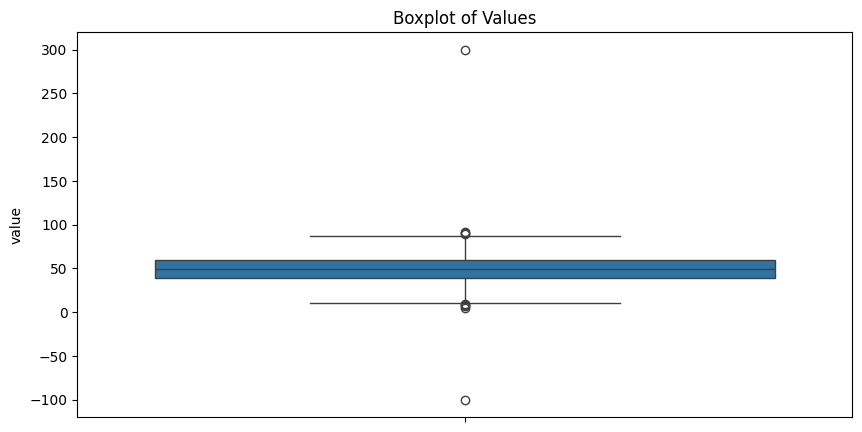

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 예제 데이터 생성
np.random.seed(0)
data = pd.DataFrame({
    'value': np.random.normal(50, 15, 1000)  # 평균이 50, 표준편차가 15인 정규분포
})

# 일부 이상치 추가
data.loc[100, 'value'] = 300
data.loc[200, 'value'] = -100

# 박스 플롯을 사용한 이상치 확인
plt.figure(figsize=(10, 5))
sns.boxplot(data['value'])
plt.title('Boxplot of Values')
plt.show()

In [14]:
# IQR 방식을 이용한 이상치 삭제
Q1 = data['value'].quantile(0.25)
Q3 = data['value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_filtered = data[(data['value'] >= lower_bound) & (data['value'] <= upper_bound)]

In [15]:
print(data_filtered)

         value
0    76.460785
1    56.002358
2    64.681070
3    83.613398
4    78.013370
..         ...
995  56.193062
996  47.024017
997  51.412885
998  32.785836
999  44.628289

[991 rows x 1 columns]


<Axes: ylabel='value'>

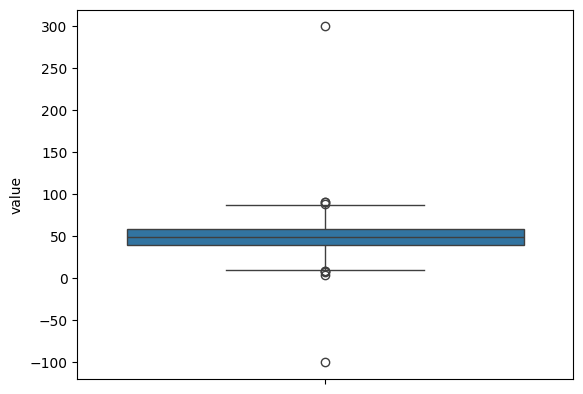

In [16]:
sns.boxplot(data['value'])

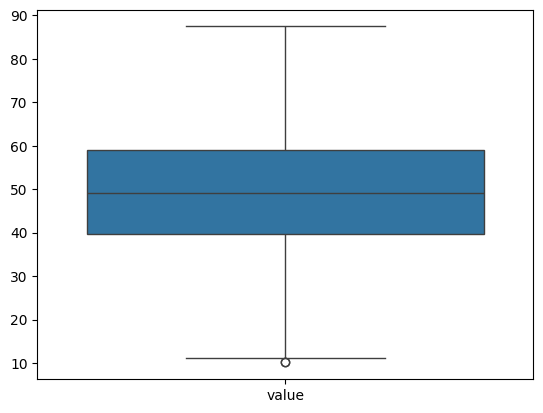

In [21]:
sns.boxplot(data_filtered)
plt.show()

In [18]:
# 평균값으로 이상치 대체
mean_value = data['value'].mean()
data['value'] = np.where((data['value'] < lower_bound) | (data['value'] > upper_bound), mean_value, data['value'])


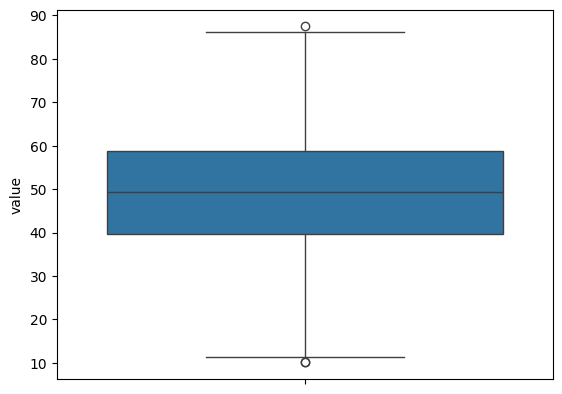

In [22]:
sns.boxplot(data['value'])
plt.show()

In [23]:
# 날짜 데이터 생성
date_data = pd.DataFrame({
    'date': ['2023-01-01', '2023-01-02', '2023-01-03']
})

# 문자열을 datetime 타입으로 변환
date_data['date'] = pd.to_datetime(date_data['date'])
print(date_data.dtypes)


date    datetime64[ns]
dtype: object
